## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata,study_results,on="Mouse ID")
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
combined_mouse_data.set_index('Drug Regimen')

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculation of the mean - need to groupby Drug Regimen
mouse_tumor_mean = combined_mouse_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']

# Calculation of the median
mouse_tumor_median = combined_mouse_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']

# Calculation of the variance
mouse_tumor_variance = combined_mouse_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']

# Calculation of the standard deviation
mouse_tumor_std = combined_mouse_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']

# Calculation of the standard error from the mean
mouse_tumor_sem = combined_mouse_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Generating the summary table
tumor_volume_statistical_summary_df = pd.DataFrame({'Mean':mouse_tumor_mean, 
                                                    'Median':mouse_tumor_median,
                                                   'Variance':mouse_tumor_variance,
                                                   'Standard Deviation': mouse_tumor_std,
                                                   'Standard Error':mouse_tumor_sem})

tumor_volume_statistical_summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

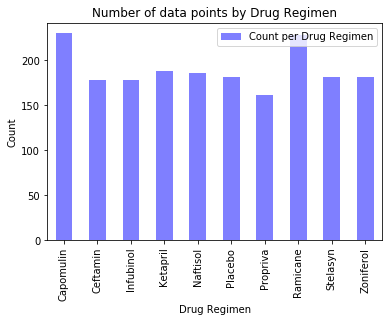

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
combined_mouse_data.head()
pandas_count_by_regimen = combined_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']

# Creating a dataframe for the count per Drug Regimen
count_by_regimen_df = pd.DataFrame({'Count per Drug Regimen':pandas_count_by_regimen})
count_by_regimen_df

# Generating the bar plot using pandas 
count_by_regimen_df.plot(kind='bar', alpha =0.5, facecolor='blue')
plt.title('Number of data points by Drug Regimen')
plt.ylabel('Count')
plt.show()

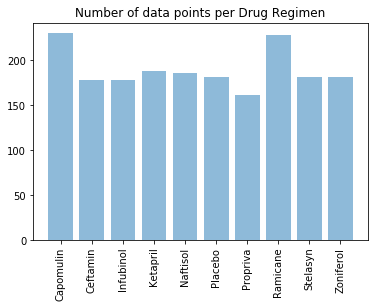

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
pyplot_count_by_regimen = combined_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']
pyplot_count_by_regimen_df = pd.DataFrame({'Number of Data points':pyplot_count_by_regimen})

# Re-indexing the data frame
re_indexed = pyplot_count_by_regimen_df.reset_index()

# Plotting using pyplot
x_axis = re_indexed['Drug Regimen']
y_axis = re_indexed['Number of Data points']

plt.bar(x_axis,y_axis, alpha = 0.5)
plt.title("Number of data points per Drug Regimen")
plt.xticks(rotation=90)
plt.show()


## Pie plots

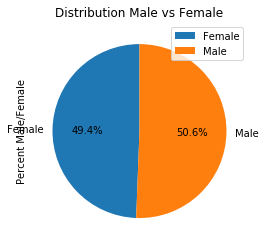

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_pandas = combined_mouse_data.groupby(['Sex']).count()['Mouse ID']

total_male_female = combined_mouse_data.count()['Mouse ID']
total_male_female

# Create the dataframe 
male_female_pandas_df = pd.DataFrame({'Distribution Male vs Female':male_female_pandas})
reset_index_male_female_df = male_female_pandas_df.reset_index()
reset_index_male_female_df

# Adding the calculated column to get the percentage value
reset_index_male_female_df['Percent Male/Female'] = (reset_index_male_female_df['Distribution Male vs Female'] / total_male_female)*100
reset_index_male_female_df

final_male_female_df = reset_index_male_female_df.drop(columns=['Distribution Male vs Female'])
final_male_female_df

# Creating the pie chart
final_male_female_df.plot(kind='pie', y='Percent Male/Female', startangle=90, autopct='%1.1f%%', labels=final_male_female_df['Sex'], legend=True)
plt.title("Distribution Male vs Female")
plt.show()

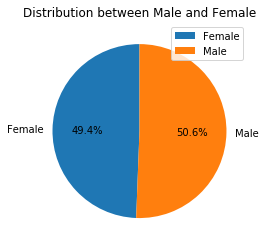

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(final_male_female_df['Percent Male/Female'], labels=final_male_female_df['Sex'], autopct='%1.1f%%', startangle=90)
plt.legend(final_male_female_df['Sex'])
plt.title('Distribution between Male and Female')
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Create a dataframe with the most promising treatments
treatments = ['Capomulin','Ramicane','Infunibol','Ceftamin']
print(len(treatments))

promising_treatment_df = combined_mouse_data[combined_mouse_data['Drug Regimen'].isin(treatments)]
promising_treatment_df

# Calculate the total tumor volume by mouse
# First step is group by mouse id, then apply the sum() function on the Tumor Volume (mm3) column
Tumor_volume_per_mouse = promising_treatment_df.groupby('Mouse ID')['Tumor Volume (mm3)'].sum()
Tumor_volume_per_mouse

Tumor_vol_df = pd.DataFrame({'Tumor Volume/mouse':Tumor_volume_per_mouse})

Final_tumor_df = Tumor_vol_df.reset_index()
Final_tumor_df

# Determine all the quartiles
quartiles = Final_tumor_df['Tumor Volume/mouse'].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print("the lower quartile value is: " + str(lowerq))
print("the upper quartile value is: " + str(upperq))
print("the interquantile value is: " + str(iqr))

Final_tumor_df


4
the lower quartile value is: 345.66341540999997
the upper quartile value is: 443.51300334000007
the interquantile value is: 97.8495879300001


,Mouse ID,Tumor Volume/mouse
0,a275,527.709651
1,a411,407.013854
2,a444,430.600524
3,a520,379.892187
4,a644,412.285775
...,...,...
70,y449,181.439088
71,y769,562.908873
72,y793,385.068292
73,y865,549.985586


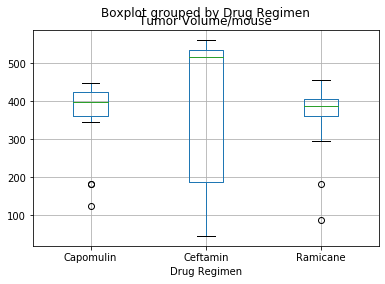

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# In order to do this, we need to get the treatment column for each mouse id - need to get it from another dataset
# Use the promising treatment dataframe created above to join 

#Data sets to merge
right = promising_treatment_df
left = Final_tumor_df

Total_Volume_df = pd.merge(left,right,how='left', left_on='Mouse ID', right_on='Mouse ID')
Total_Volume_df

Final_Total_Volume_df = Total_Volume_df.drop(columns=['Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites'])
Final_Total_Volume_df

# Filter by drug regimen - dropping duplicates on Mouse ID
Final_Total_Volume_df = Final_Total_Volume_df.drop_duplicates()
Final_Total_Volume_df

# Creating the box and whisker plot
Final_Total_Volume_df.boxplot(by='Drug Regimen',column=['Tumor Volume/mouse'])
#plt.title('Box Plot of the Total tumor volume')
plt.show()


In [21]:
# Getting the volume based on the timepoint
promising_treatment_df

tumor_response = promising_treatment_df.groupby(['Drug Regimen','Timepoint'])
tumor_response
tumor_response_df = tumor_response['Tumor Volume (mm3)'].mean().to_frame()
tumor_response_df

new_tumor_response_df = tumor_response_df.reset_index()
last_tumor_response_df = new_tumor_response_df.drop_duplicates(['Drug Regimen'], keep='last')


last_tumor_response_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,Capomulin,45,36.236114
19,Ceftamin,45,64.132421
29,Ramicane,45,34.955595


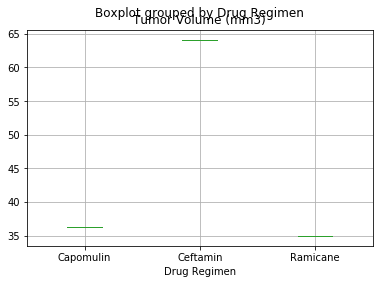

In [23]:
# Generating the graph

# Determine all the quartiles
quartiles = last_tumor_response_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

last_tumor_response_df.boxplot(by='Drug Regimen', column=["Tumor Volume (mm3)"])
plt.show()

In [108]:
#Final_Total_Volume_df
column = 'Tumor Volume/mouse'
Final_Total_Volume_df[column].max()
Final_Total_Volume_df[column].min()
Final_Total_Volume_df[column].mean()

371.8142255966667

## Line and scatter plots

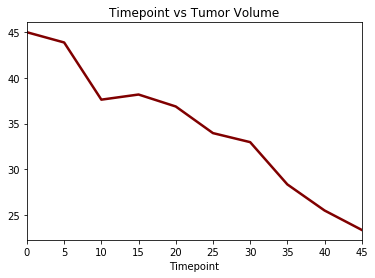

In [110]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Munging the data to only grab the capomulin data
capomulin_mouse_data_df = combined_mouse_data[combined_mouse_data['Drug Regimen']=='Capomulin']
capomulin_mouse_data_df

#mouse_id = 's185'
mouse_s185 = capomulin_mouse_data_df[capomulin_mouse_data_df['Mouse ID']=='s185']
mouse_s185

# Generating the line chart
mouse_s185.set_index('Timepoint')['Tumor Volume (mm3)'].plot(linewidth=2.5, color='maroon')
plt.title("Timepoint vs Tumor Volume")
plt.show()

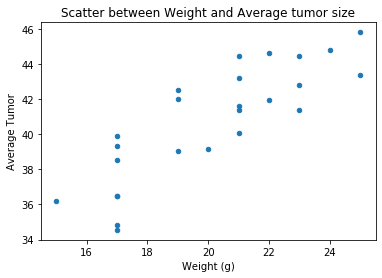

In [114]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mouse_data_df
average_tumor_by_mouse = capomulin_mouse_data_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_tumor_by_mouse

average_tumor_by_mouse_df = pd.DataFrame({'Average Tumor':average_tumor_by_mouse})
average_tumor_by_mouse_df


capomulin_mouse_data_df

Final_average_tumor_df = pd.merge(average_tumor_by_mouse_df,capomulin_mouse_data_df,how='left', left_on='Mouse ID', right_on='Mouse ID')
Final_average_tumor_df = Final_average_tumor_df.drop(columns=['Sex','Age_months','Timepoint',
                                                             'Metastatic Sites','Tumor Volume (mm3)','Drug Regimen'])

# Dropping duplicates
Final_average_tumor_df = Final_average_tumor_df.drop_duplicates()
Final_average_tumor_df

# Creating the scatter plot
Final_average_tumor_df.plot.scatter(x='Weight (g)',y='Average Tumor')
plt.title('Scatter between Weight and Average tumor size')
plt.show()

The correlation between the weight and the tumor volulme is:0.8419363424694716


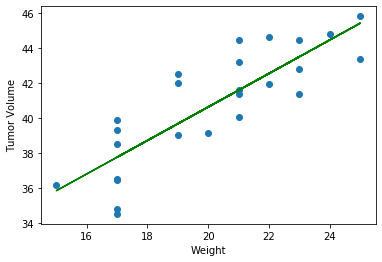

In [133]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Variables for correlation and linear regression
Average_tumor = Final_average_tumor_df['Average Tumor']
Weight = Final_average_tumor_df['Weight (g)']

# Calculate correlation
correl_weight_vs_tumor = sts.pearsonr(Weight,Average_tumor)[0]
print("The correlation between the weight and the tumor volulme is:" + str(correl_weight_vs_tumor))

# Linear Regression
vc_slope, vc_int, vc_r, vc_p, vc_std_err = sts.linregress(Weight, Average_tumor)
vc_fit = vc_slope * Weight + vc_int


plt.scatter(Weight, Average_tumor)
plt.plot(Weight,vc_fit, color='g')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()
